# cygnus-action-sampling

Analyze behavior of Cygnus when performing action sampling.


In [3]:
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

In [8]:
# Knobs
base_dir = '/u/cmolder/GitHub/ChampSim/out/pythia/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
    'L2C_pf_issued',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
    {'PC'}, 
    {'PC_Delta'}, 
    {'Delta_Path'}, 
    {'Global'}
]
baselines = ['bo', 'spp_dev2', 'bingo', 'next_line', 'ip_stride']
dpi = 150
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Cygnus': colormaps['Reds'],
    'Cygnus-Ignore': colormaps['Greens'],
}

# Plots (suites)

In [10]:
reload(tables)
reload(utils)
dfs = {
    # ===
    # ===== Baseline models =====
    # ===
    'degree1/baseline': tables.load_stats_csv(
        base_dir, 'degree1/baseline.csv', baselines, prefetchers_level='l2'),

    # ===
    # ===== "Fair" models ===== (No action fallback, no zero-offset action)
    # ===
    # Pythia
    'degree1/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/nozeroaction.csv', 
        features),

    # Cygnus
    'degree1/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction.csv', 
        features, feature_key='bythio_features'),

    # Cygnus-Ignore
    'degree1/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_ignorequeued.csv', 
        features, feature_key='bythio_features'),

    # Pythia-Ignore
    'degree1/bythio/nozeroaction_pythialike_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_pythialike_ignorequeued.csv', 
        features, feature_key='bythio_features'),
   
    # ===
    # ===== "Fair" models with action sampling ===== (No action fallback, no zero-offset action)
    # ===
    # Cygnus-Ignore, 1 random sample
    'degree1/bythio/nozeroaction_ignorequeued_sampled/1random': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_ignorequeued_sampled/1random.csv', 
        features, feature_key='bythio_features'),

    # Cygnus-Ignore, 2 random samples
    'degree1/bythio/nozeroaction_ignorequeued_sampled/2random': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_ignorequeued_sampled/2random.csv', 
        features, feature_key='bythio_features'),

    # Cygnus-Ignore, 4 random samples
    'degree1/bythio/nozeroaction_ignorequeued_sampled/4random': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_ignorequeued_sampled/4random.csv', 
        features, feature_key='bythio_features'),

    # Cygnus-Ignore, 8 random samples
    'degree1/bythio/nozeroaction_ignorequeued_sampled/8random': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_ignorequeued_sampled/8random.csv', 
        features, feature_key='bythio_features'),
}

## Degree-1

### Random action sampling
Compare Bythio-Ignore with action sampling to plain Bythio-Ignore, Pythia, and Pythia-Ignore.

In [30]:
pythia_feature = 'Delta_Path, PC_Delta'
cygnus_feature = 'PC'

rand_sample_df = {
    f'Pythia ({pythia_feature})': dfs['degree1/pythia/nozeroaction'][pythia_feature],
    f'Pythia-Ignore ({pythia_feature})': dfs['degree1/bythio/nozeroaction_pythialike_ignorequeued'][pythia_feature],
    f'Cygnus ({cygnus_feature})': dfs['degree1/bythio/nozeroaction'][cygnus_feature],
    f'Cygnus-Ignore-1 Rand ({cygnus_feature})': dfs['degree1/bythio/nozeroaction_ignorequeued_sampled/1random'][cygnus_feature],
    f'Cygnus-Ignore-2 Rand ({cygnus_feature})': dfs['degree1/bythio/nozeroaction_ignorequeued_sampled/2random'][cygnus_feature],
    f'Cygnus-Ignore-4 Rand ({cygnus_feature})': dfs['degree1/bythio/nozeroaction_ignorequeued_sampled/4random'][cygnus_feature],
    f'Cygnus-Ignore-8 Rand ({cygnus_feature})': dfs['degree1/bythio/nozeroaction_ignorequeued_sampled/8random'][cygnus_feature],
    f'Cygnus-Ignore ({cygnus_feature})': dfs['degree1/bythio/nozeroaction_ignorequeued'][cygnus_feature],
}

rand_sample_colors = {
    f'Pythia ({pythia_feature})': cmaps['Pythia'](0.7),
    f'Pythia-Ignore ({pythia_feature})': cmaps['Pythia-Ignore'](0.7),
    f'Cygnus ({cygnus_feature})': cmaps['Cygnus'](0.7),
    f'Cygnus-Ignore-1 Rand ({cygnus_feature})': cmaps['Cygnus-Ignore'](0.45),
    f'Cygnus-Ignore-2 Rand ({cygnus_feature})': cmaps['Cygnus-Ignore'](0.5),
    f'Cygnus-Ignore-4 Rand ({cygnus_feature})': cmaps['Cygnus-Ignore'](0.6),
    f'Cygnus-Ignore-8 Rand ({cygnus_feature})': cmaps['Cygnus-Ignore'](0.7),
    f'Cygnus-Ignore ({cygnus_feature})': cmaps['Cygnus-Ignore'](0.8),
}

legend_kwargs = {
    'ncol': 4,
    'fontsize': 6,
}

=== spec06 weighted ===


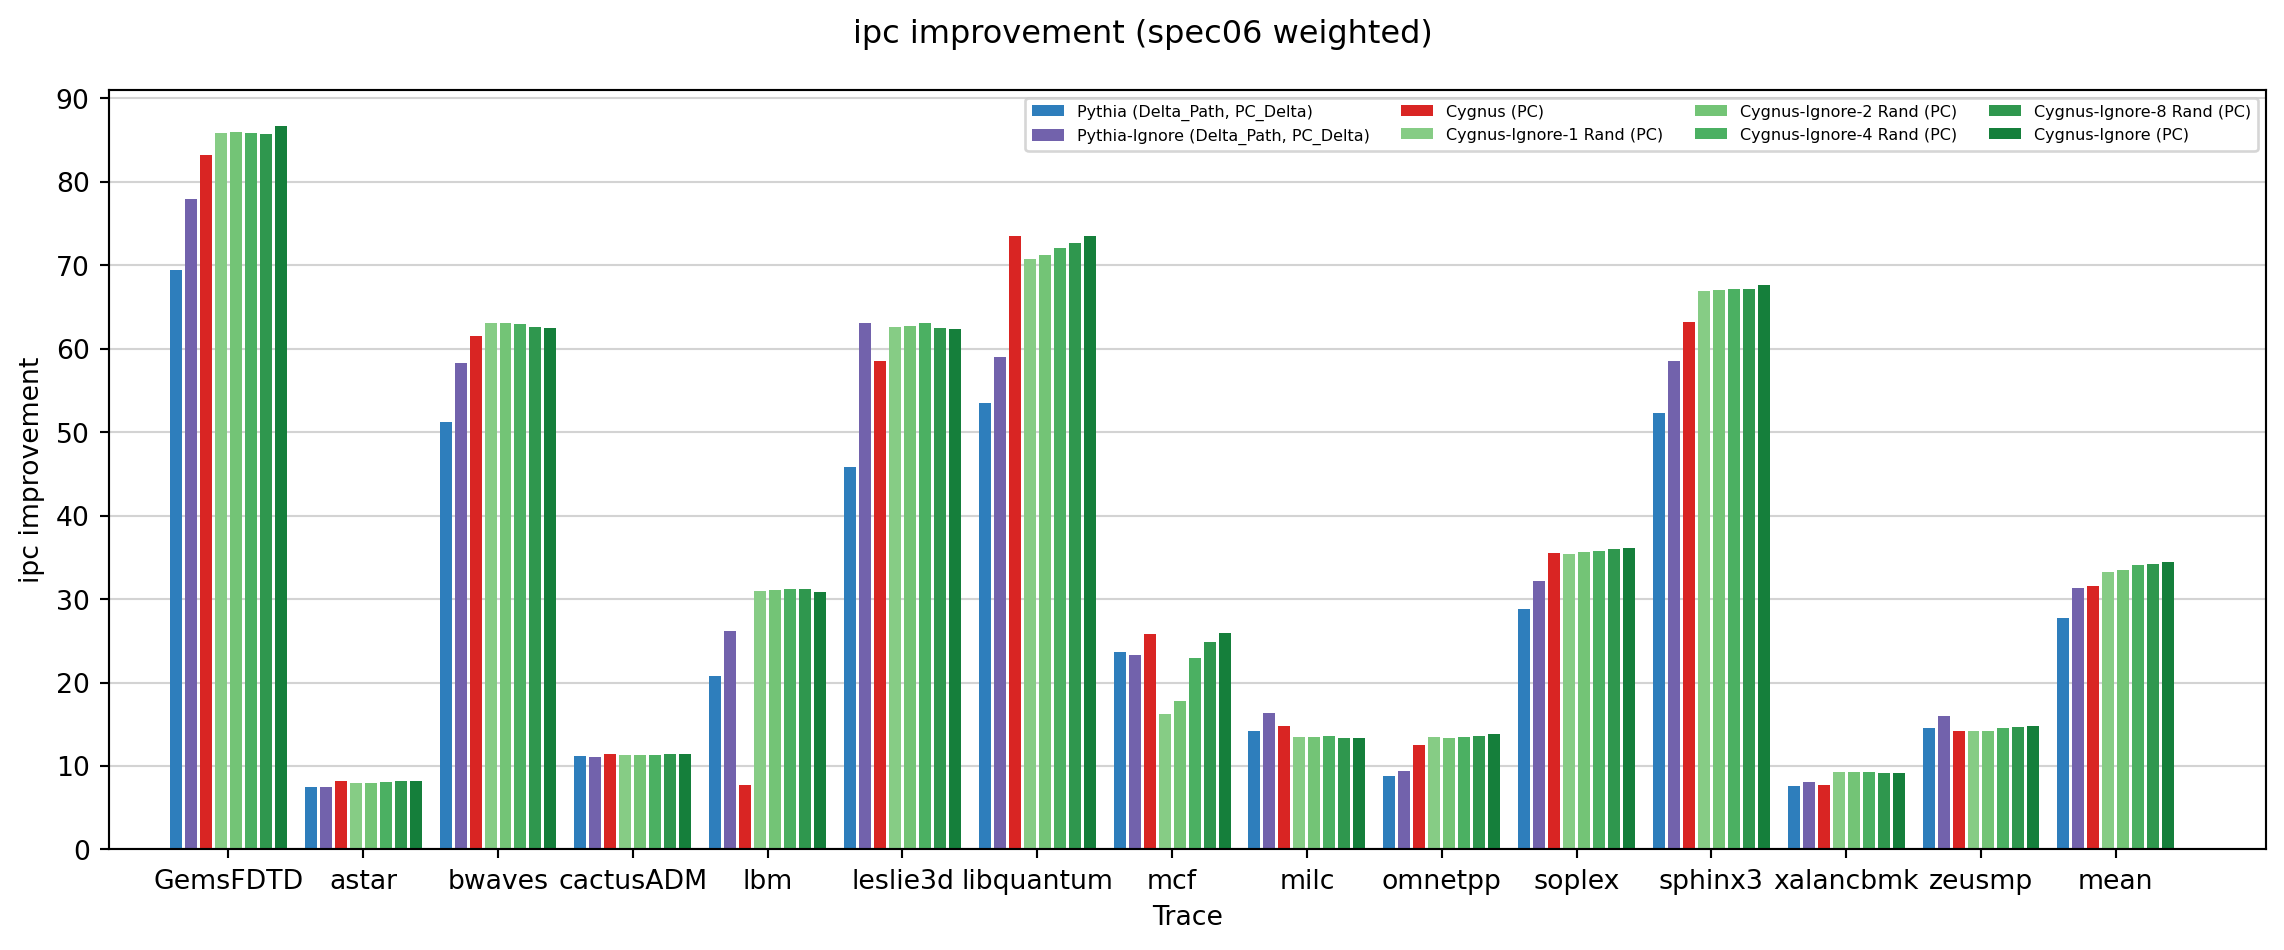

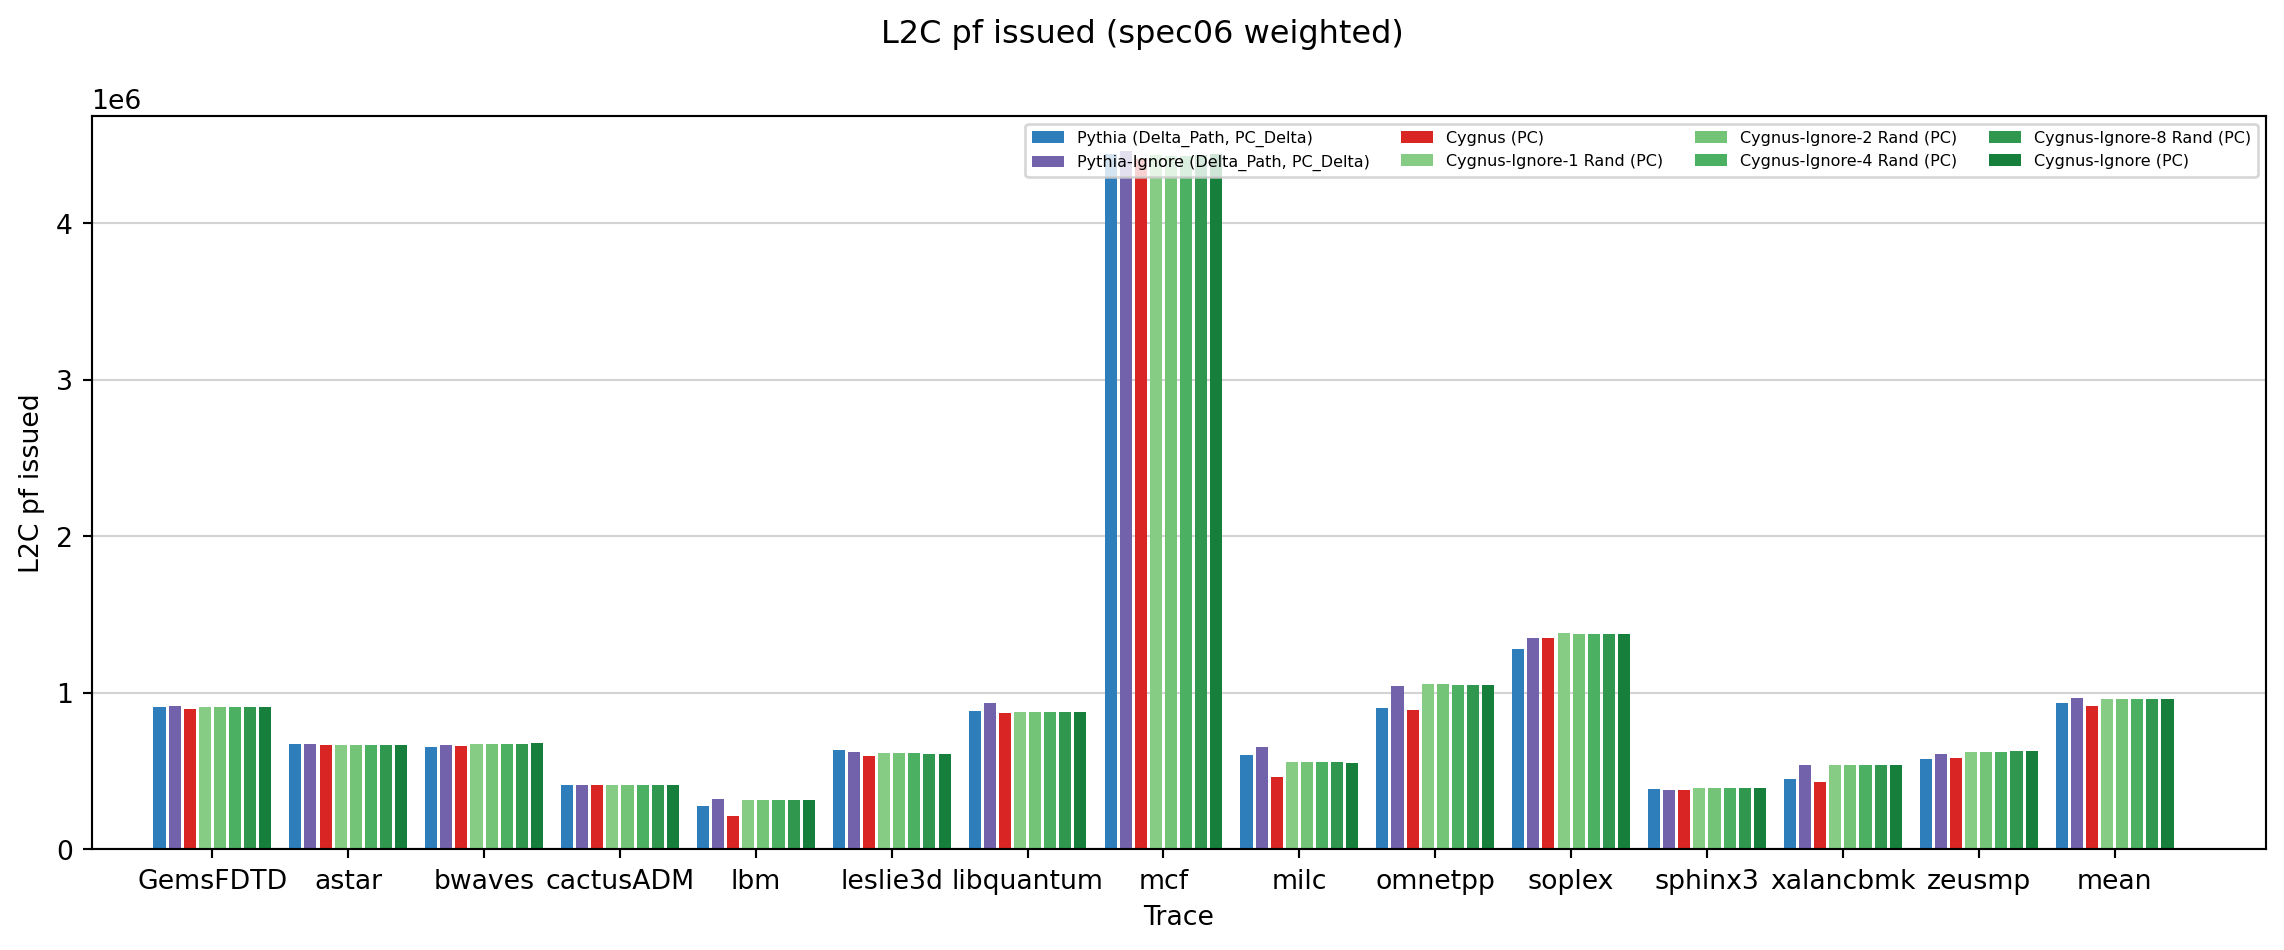

=== gap one_phase ===


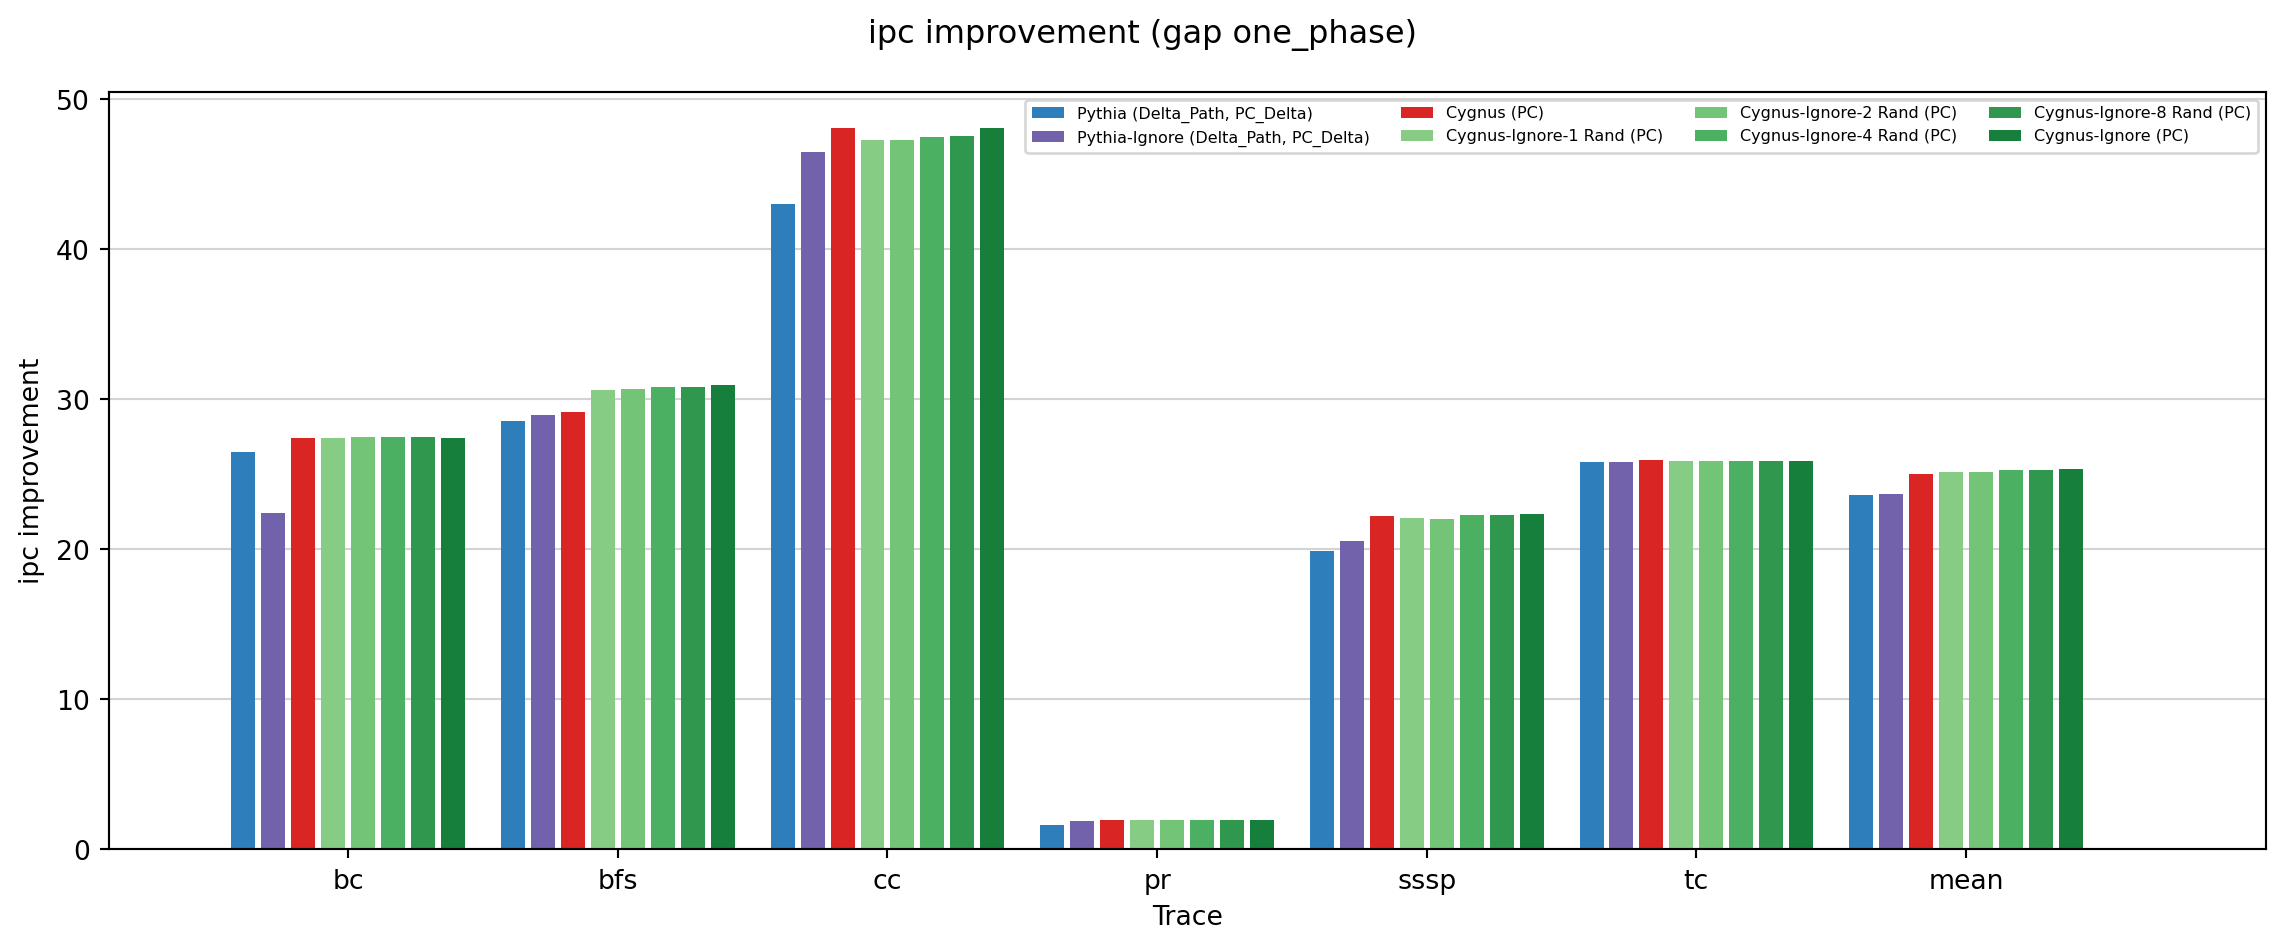

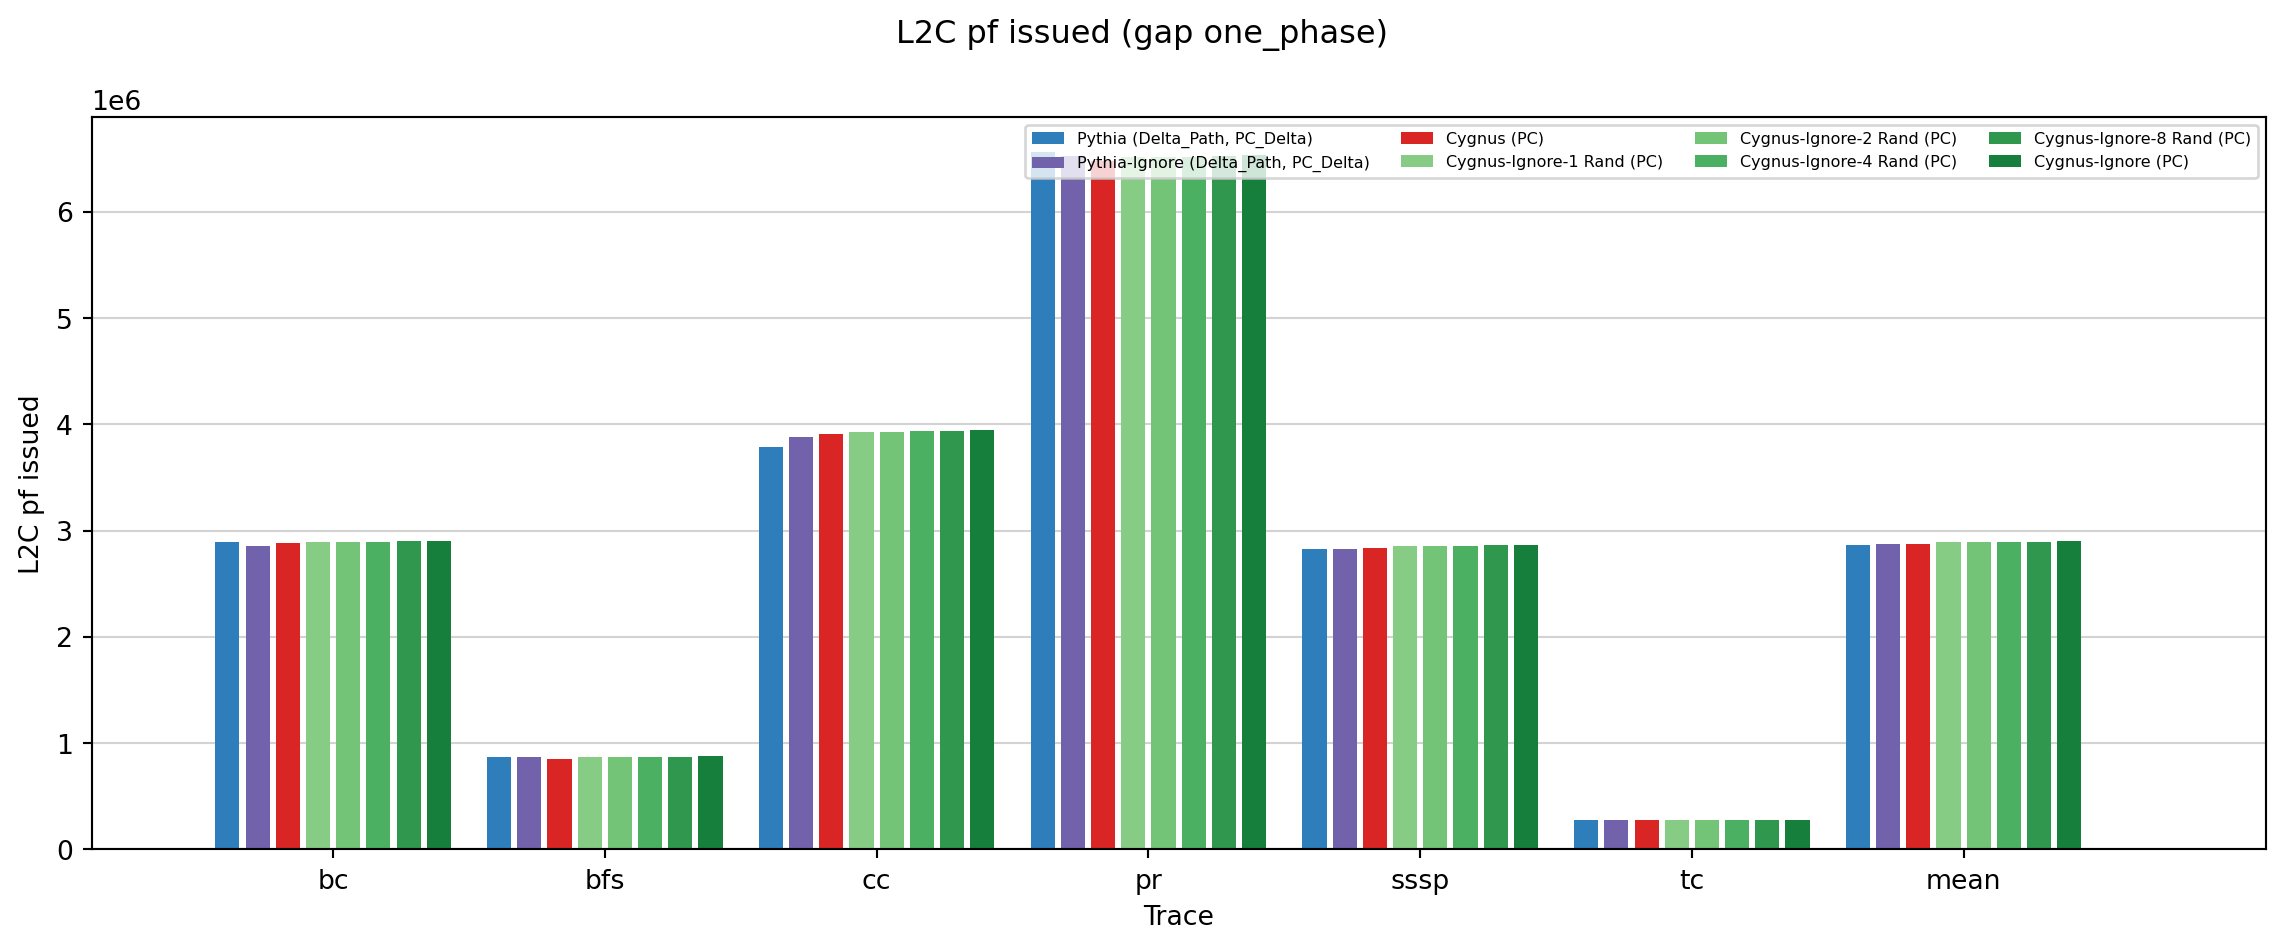

=== google one_phase ===


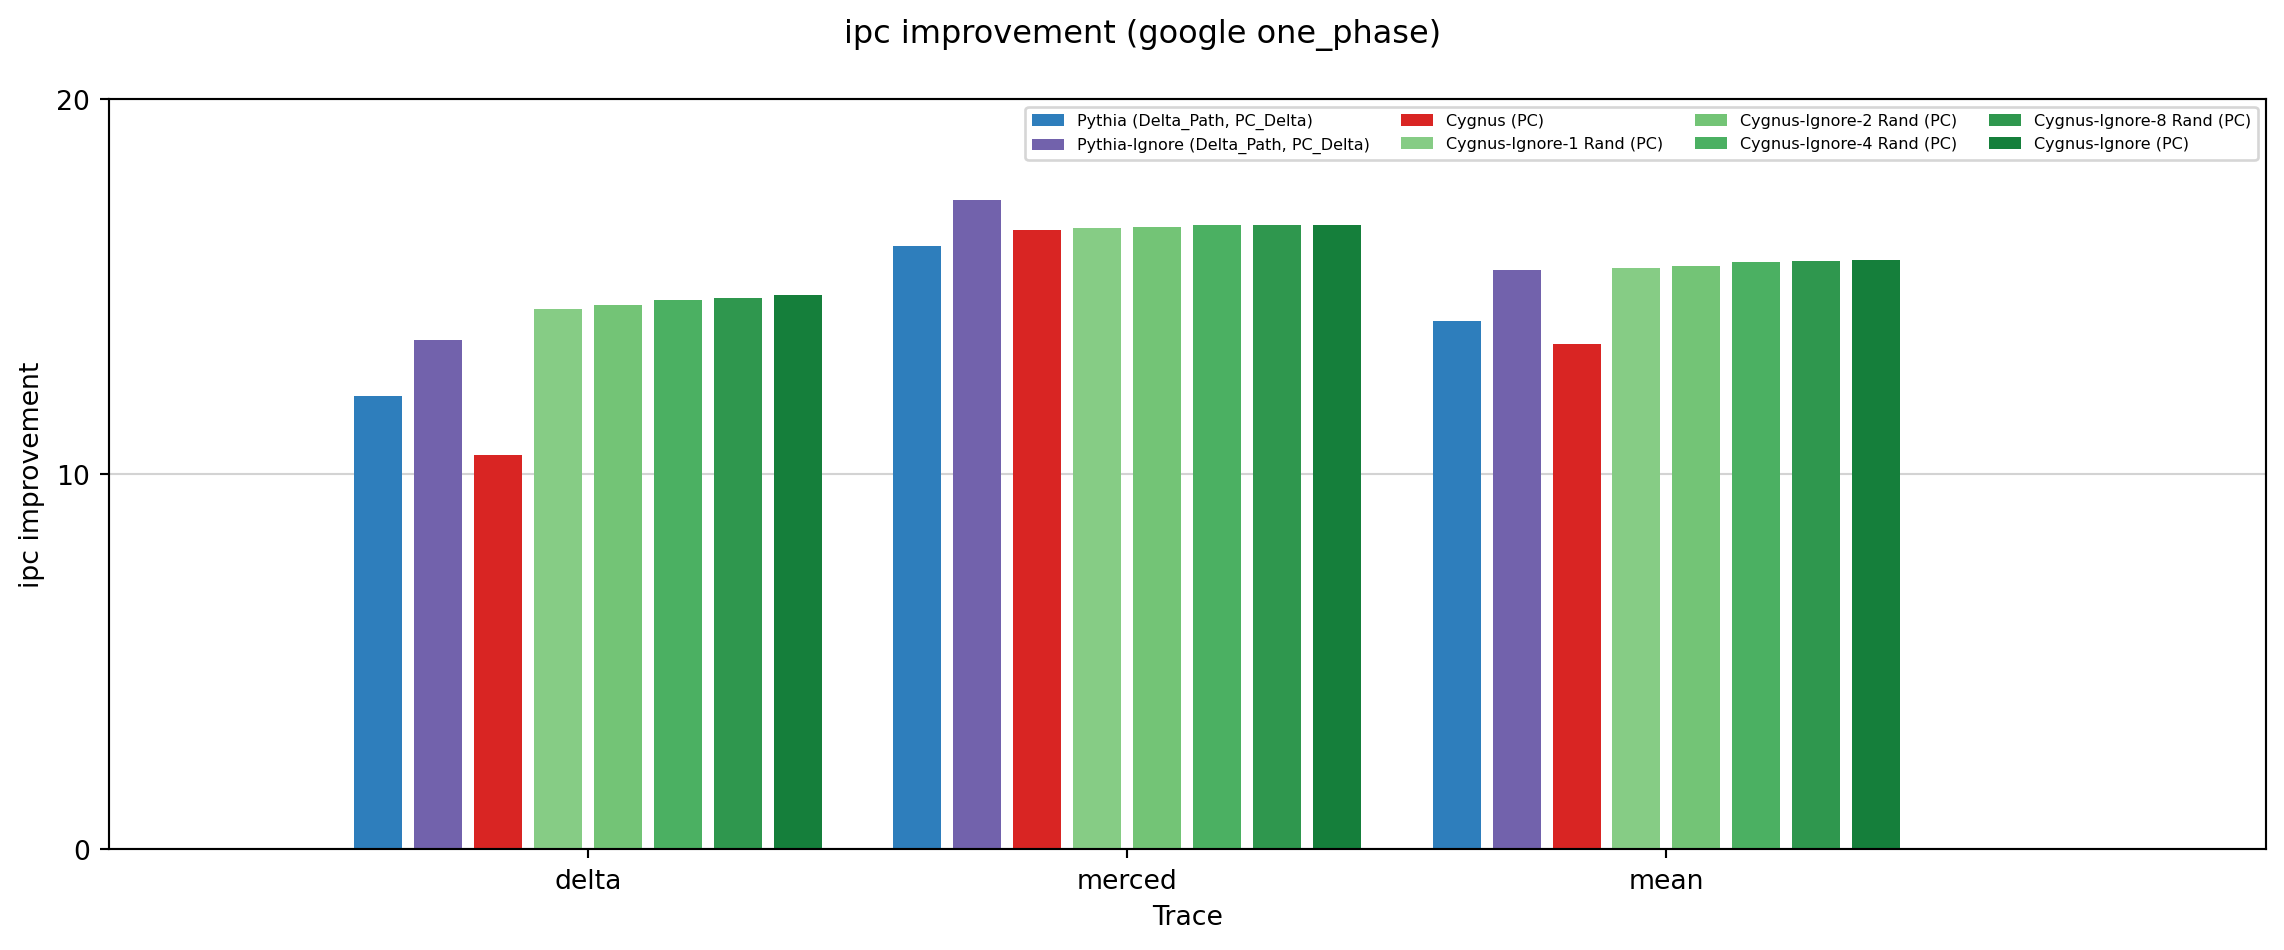

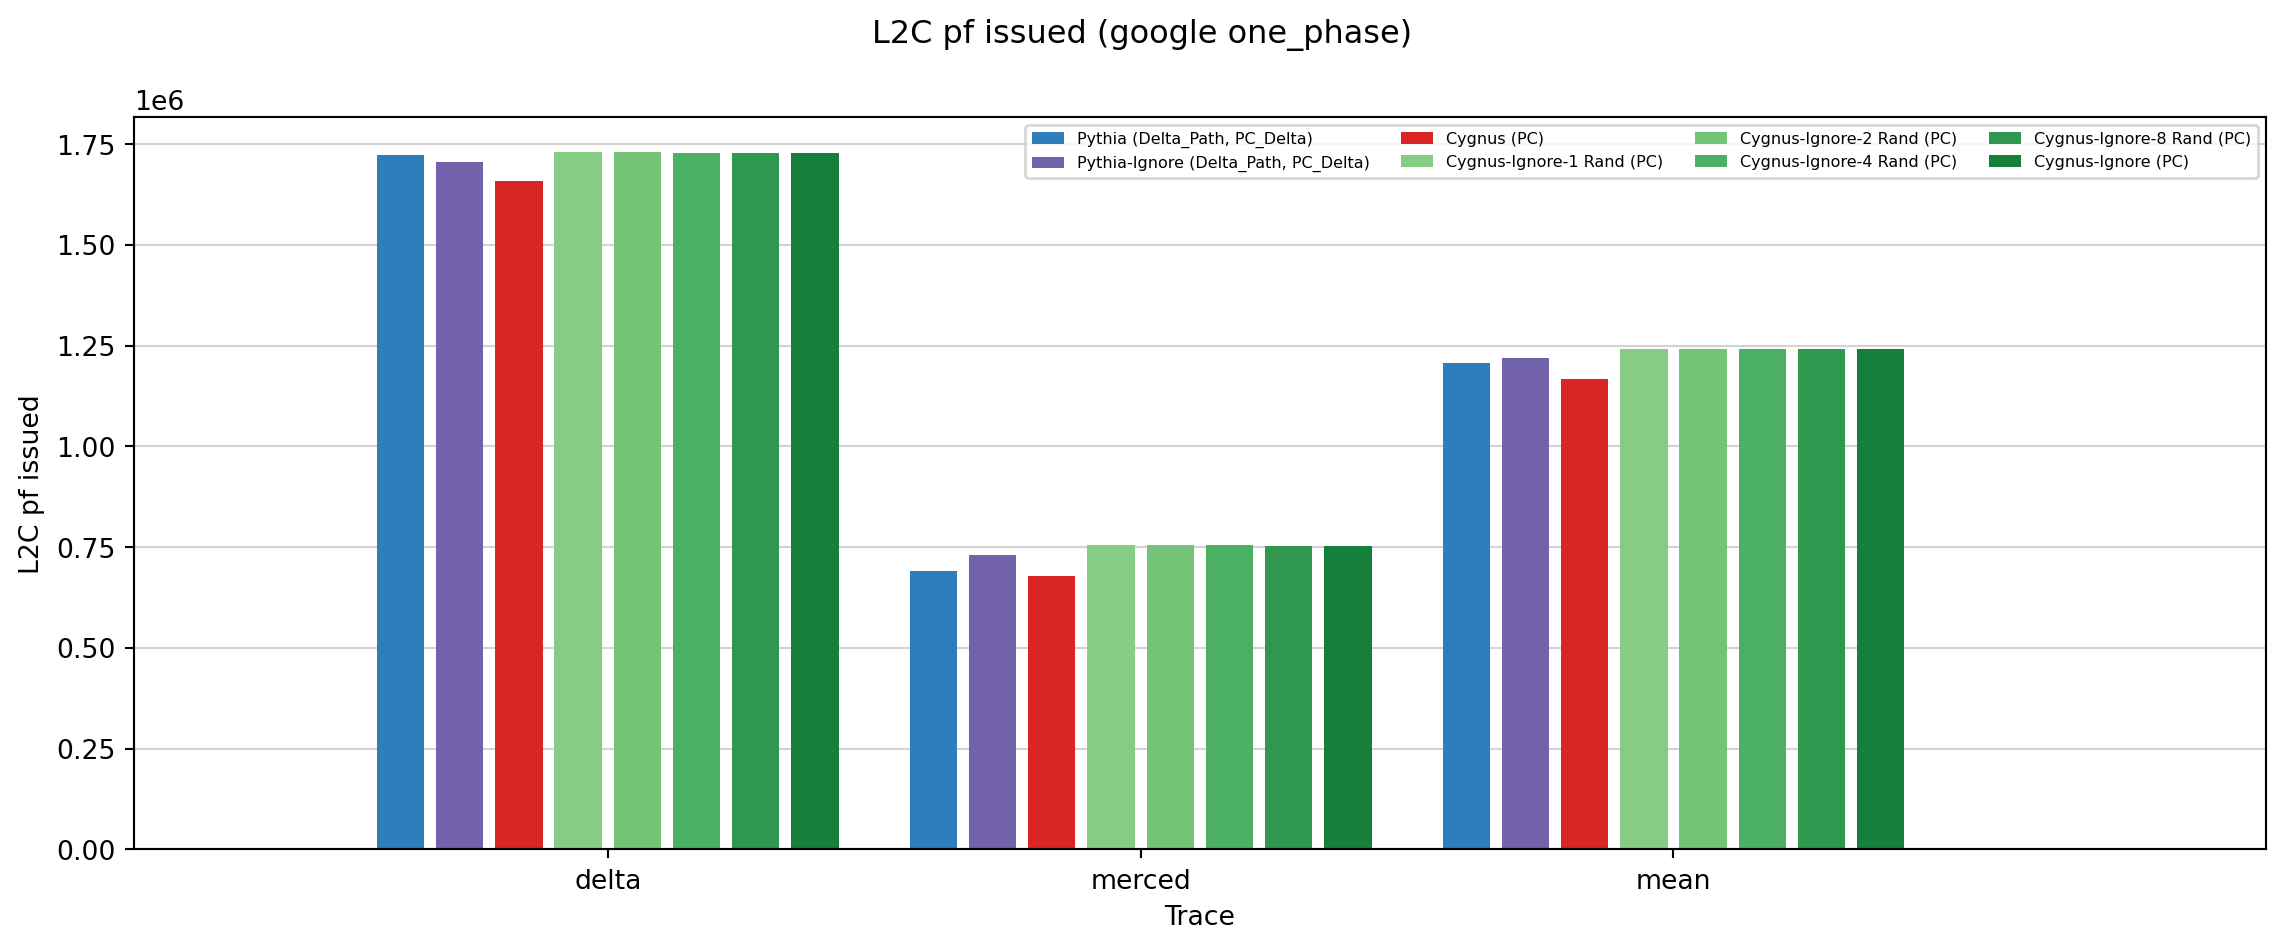

In [31]:
plots.plot_everything(rand_sample_df, suites=suites, metrics=metrics, colors=rand_sample_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

=== spec06 weighted ===


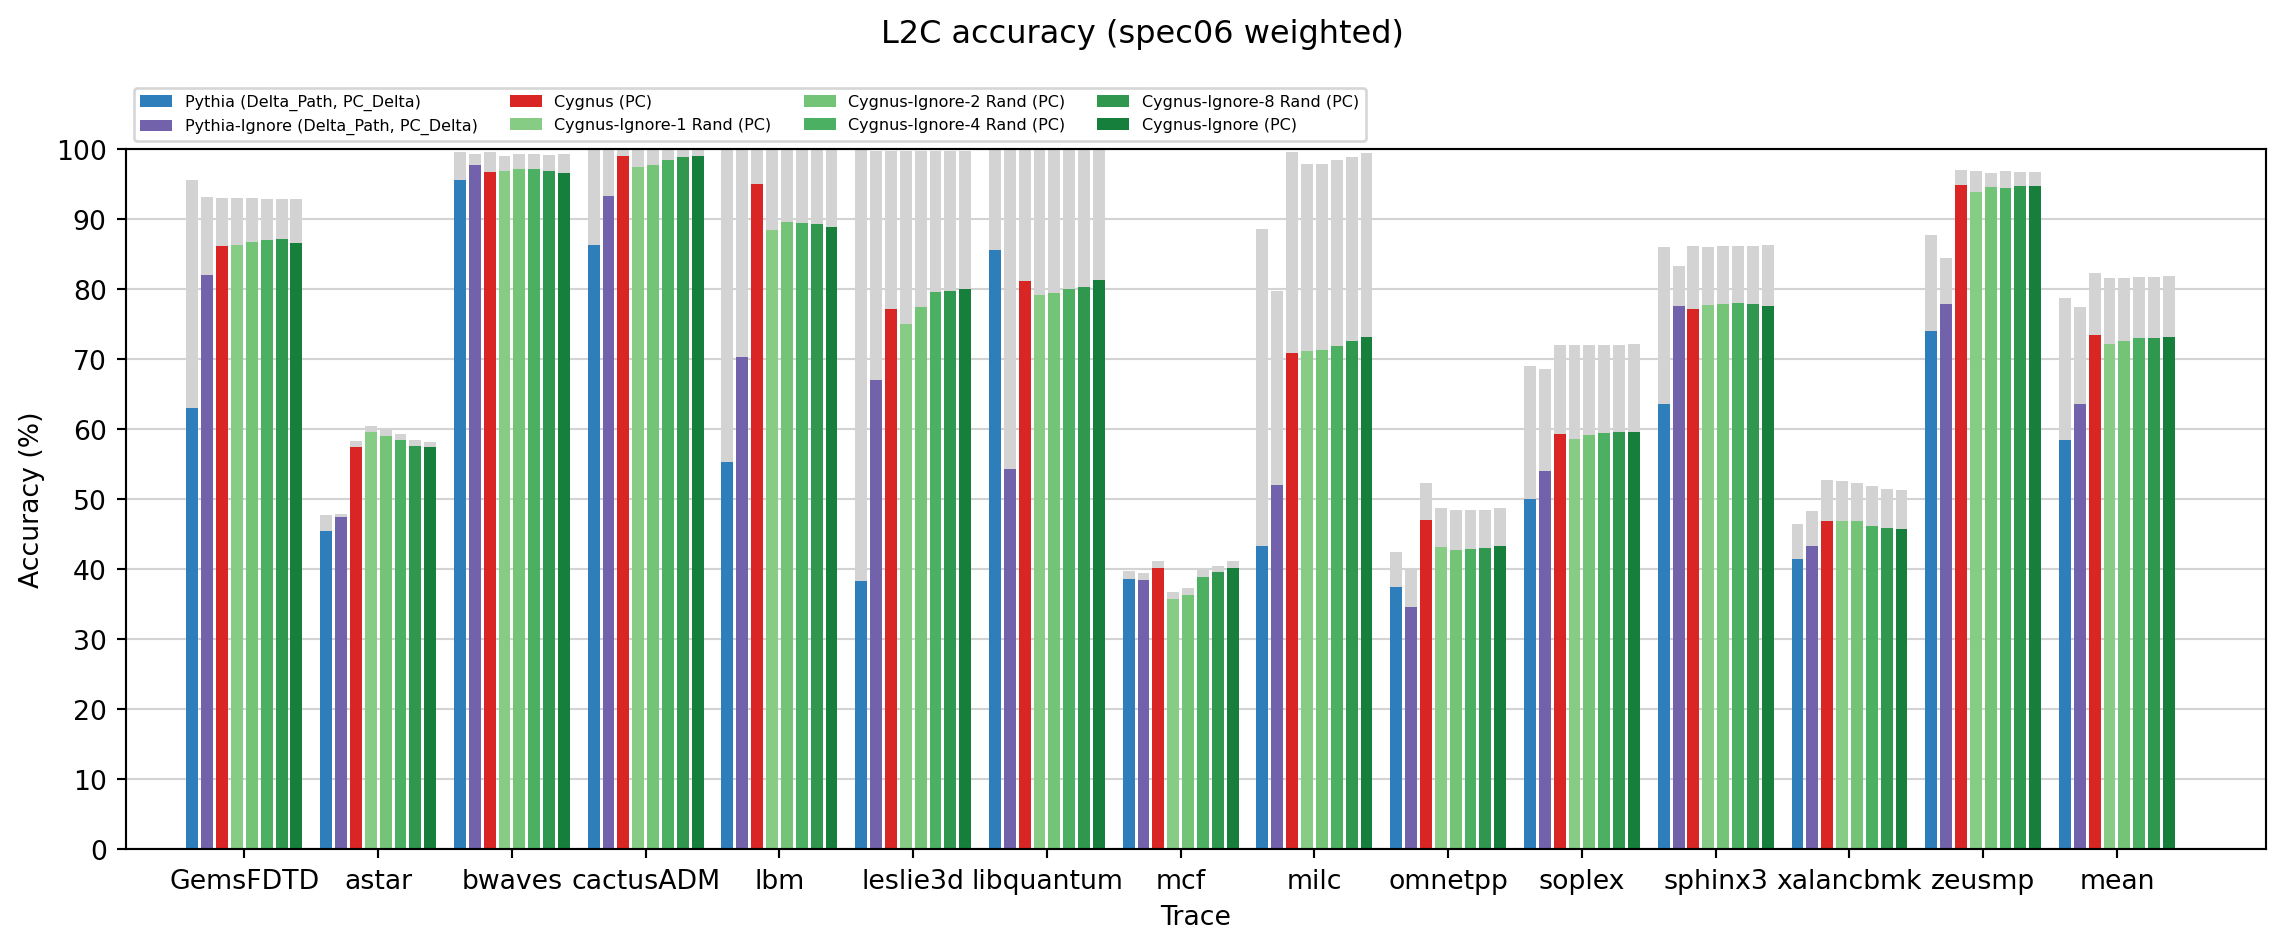

=== gap one_phase ===


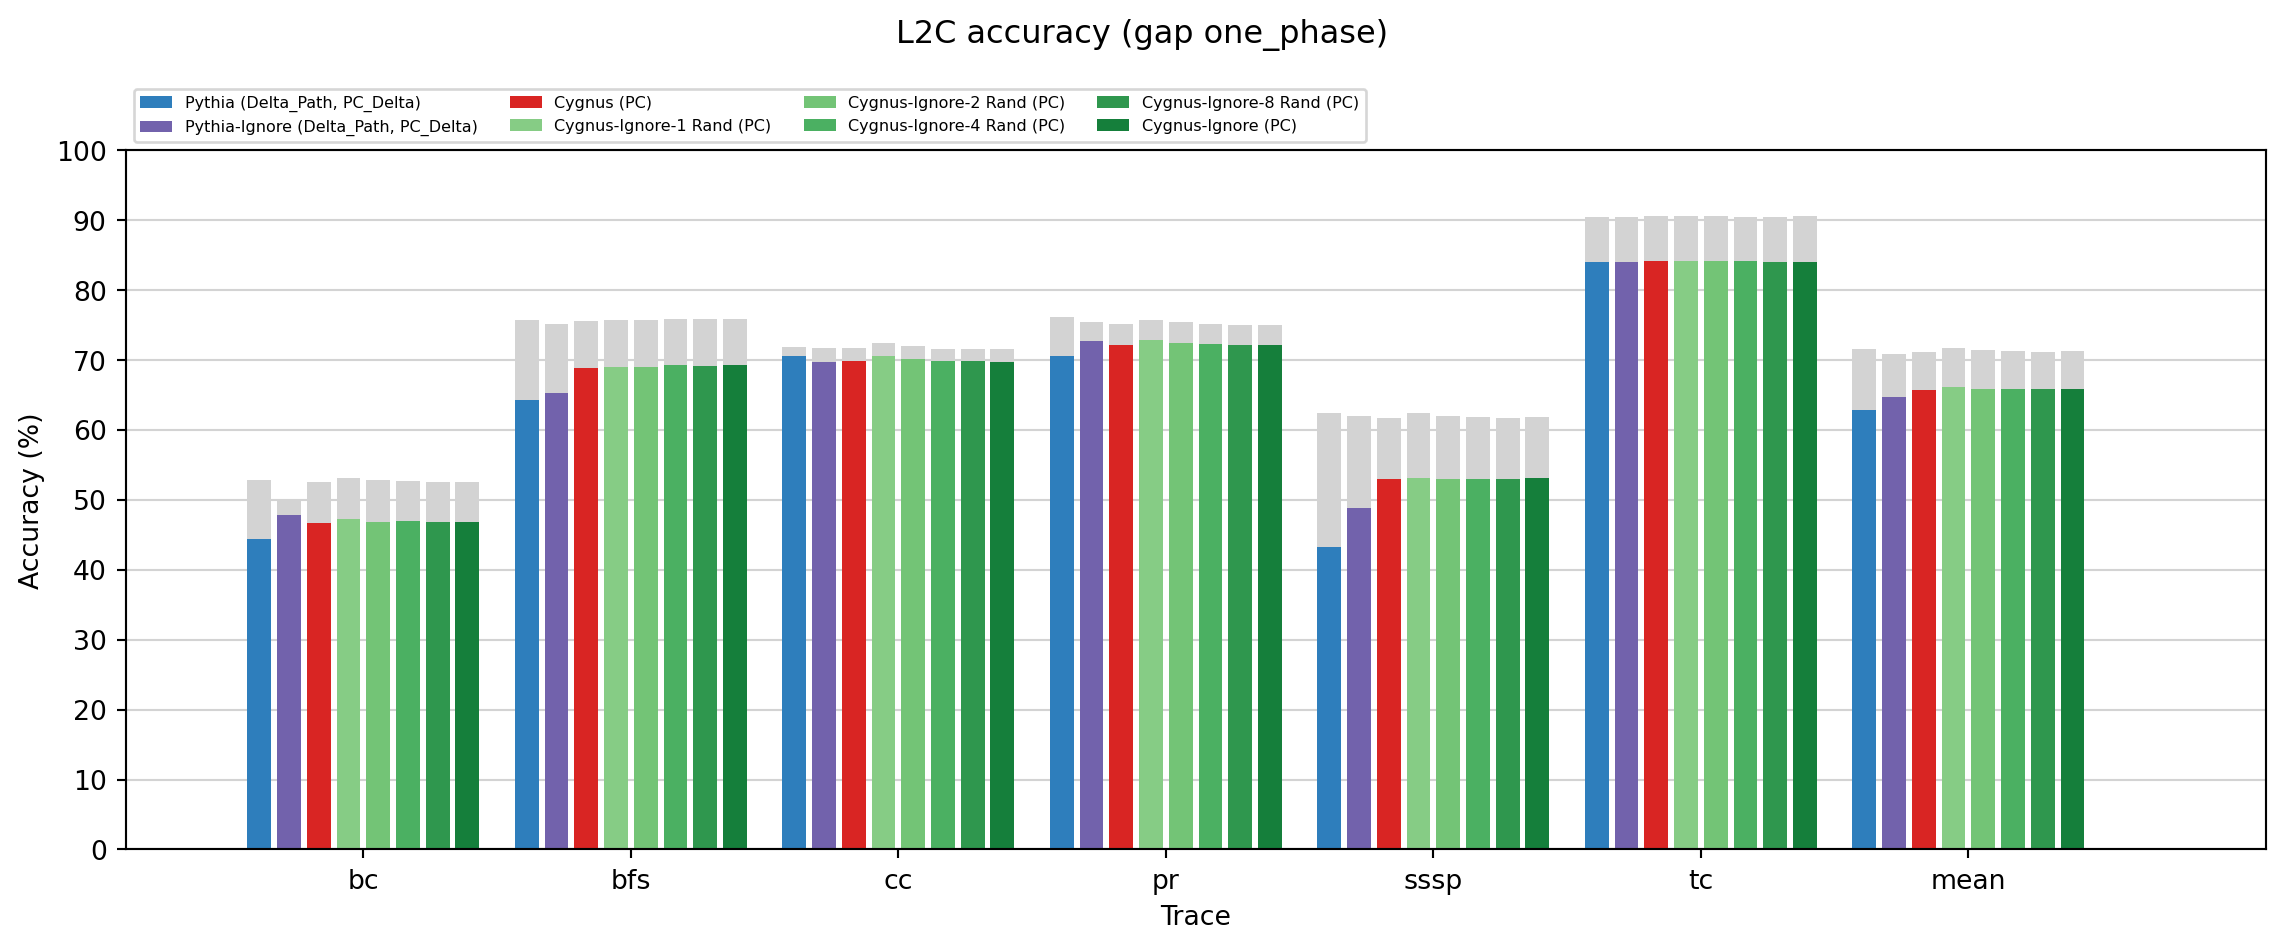

=== google one_phase ===


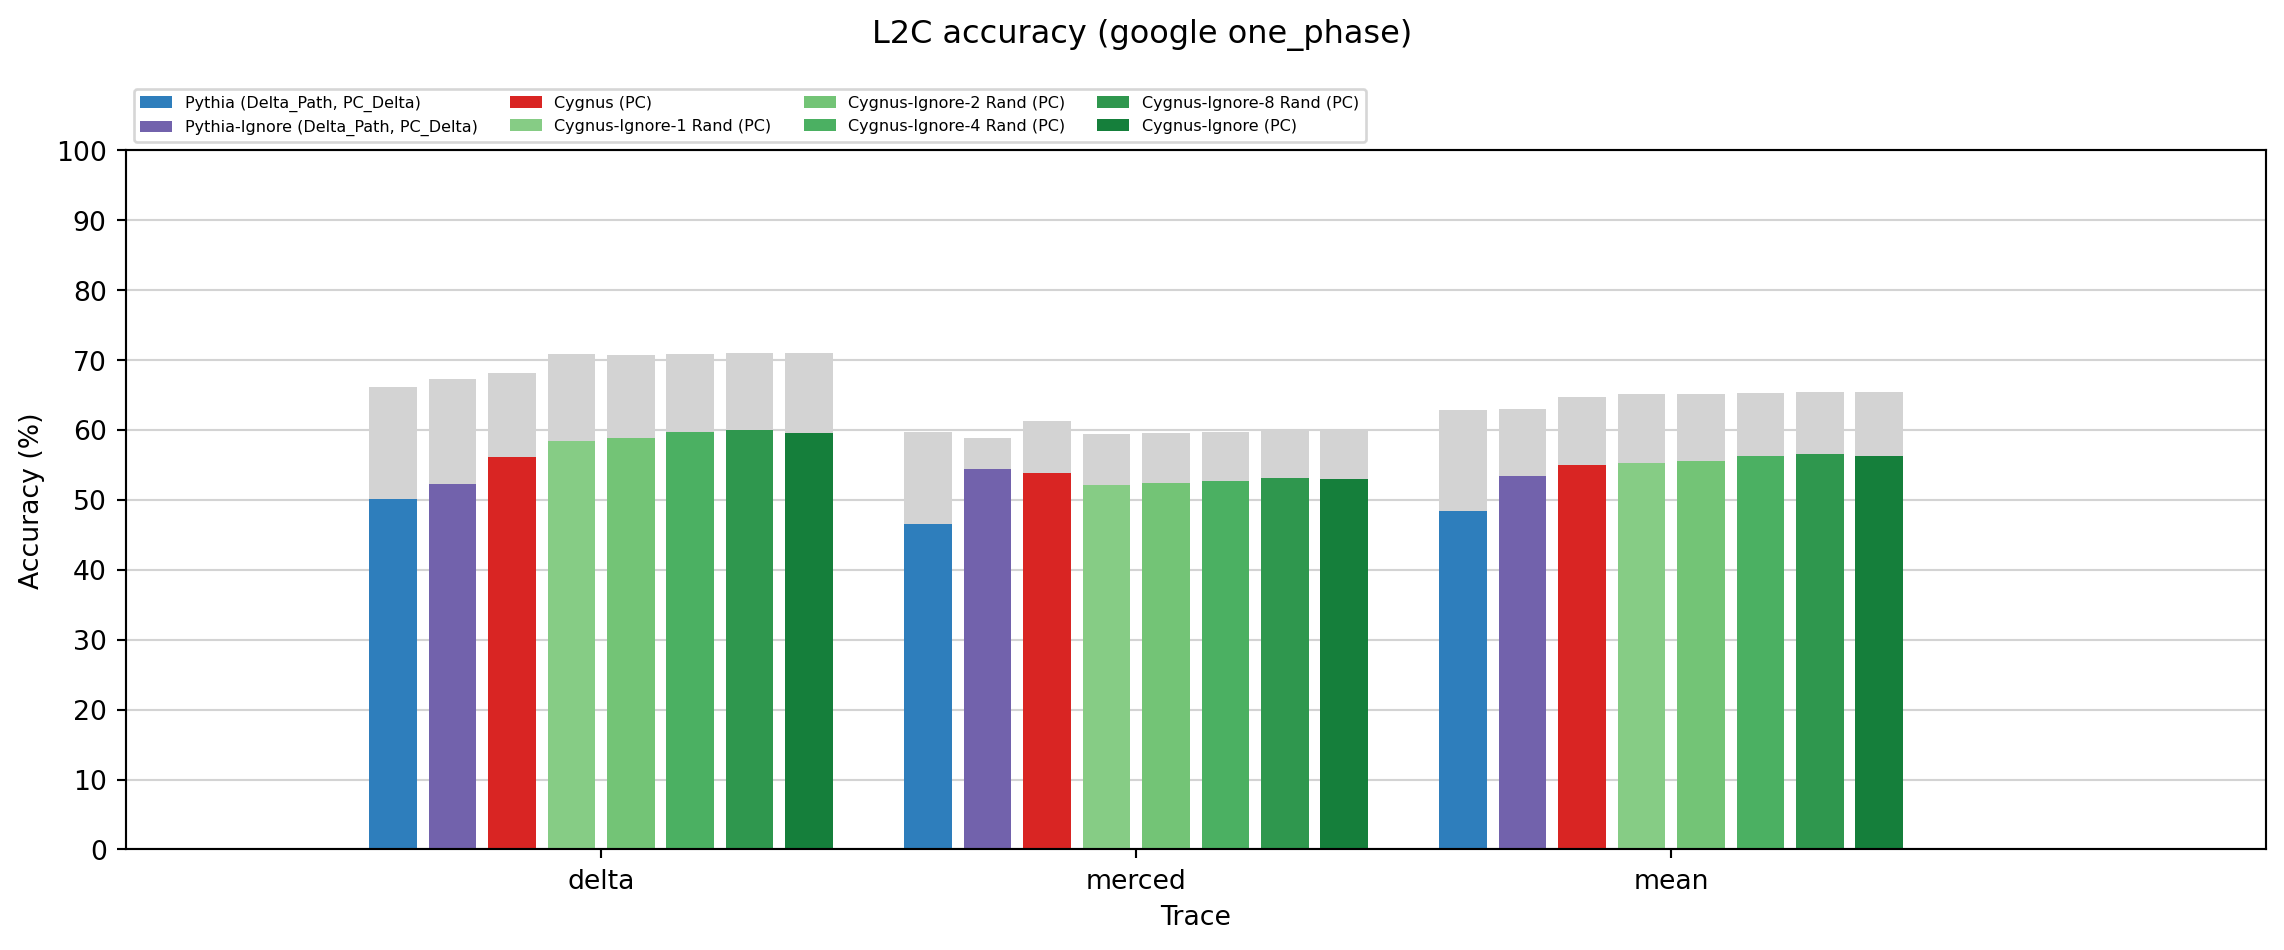

In [36]:
legend_kwargs = {
    'ncol': 4,
    'fontsize': 6,
    'loc': 'lower left',
    'bbox_to_anchor': (0, 1),
}
plots.plot_everything_accuracy(rand_sample_df, suites=suites, level='L2C', colors=rand_sample_colors,
                               legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

=== spec06 weighted ===


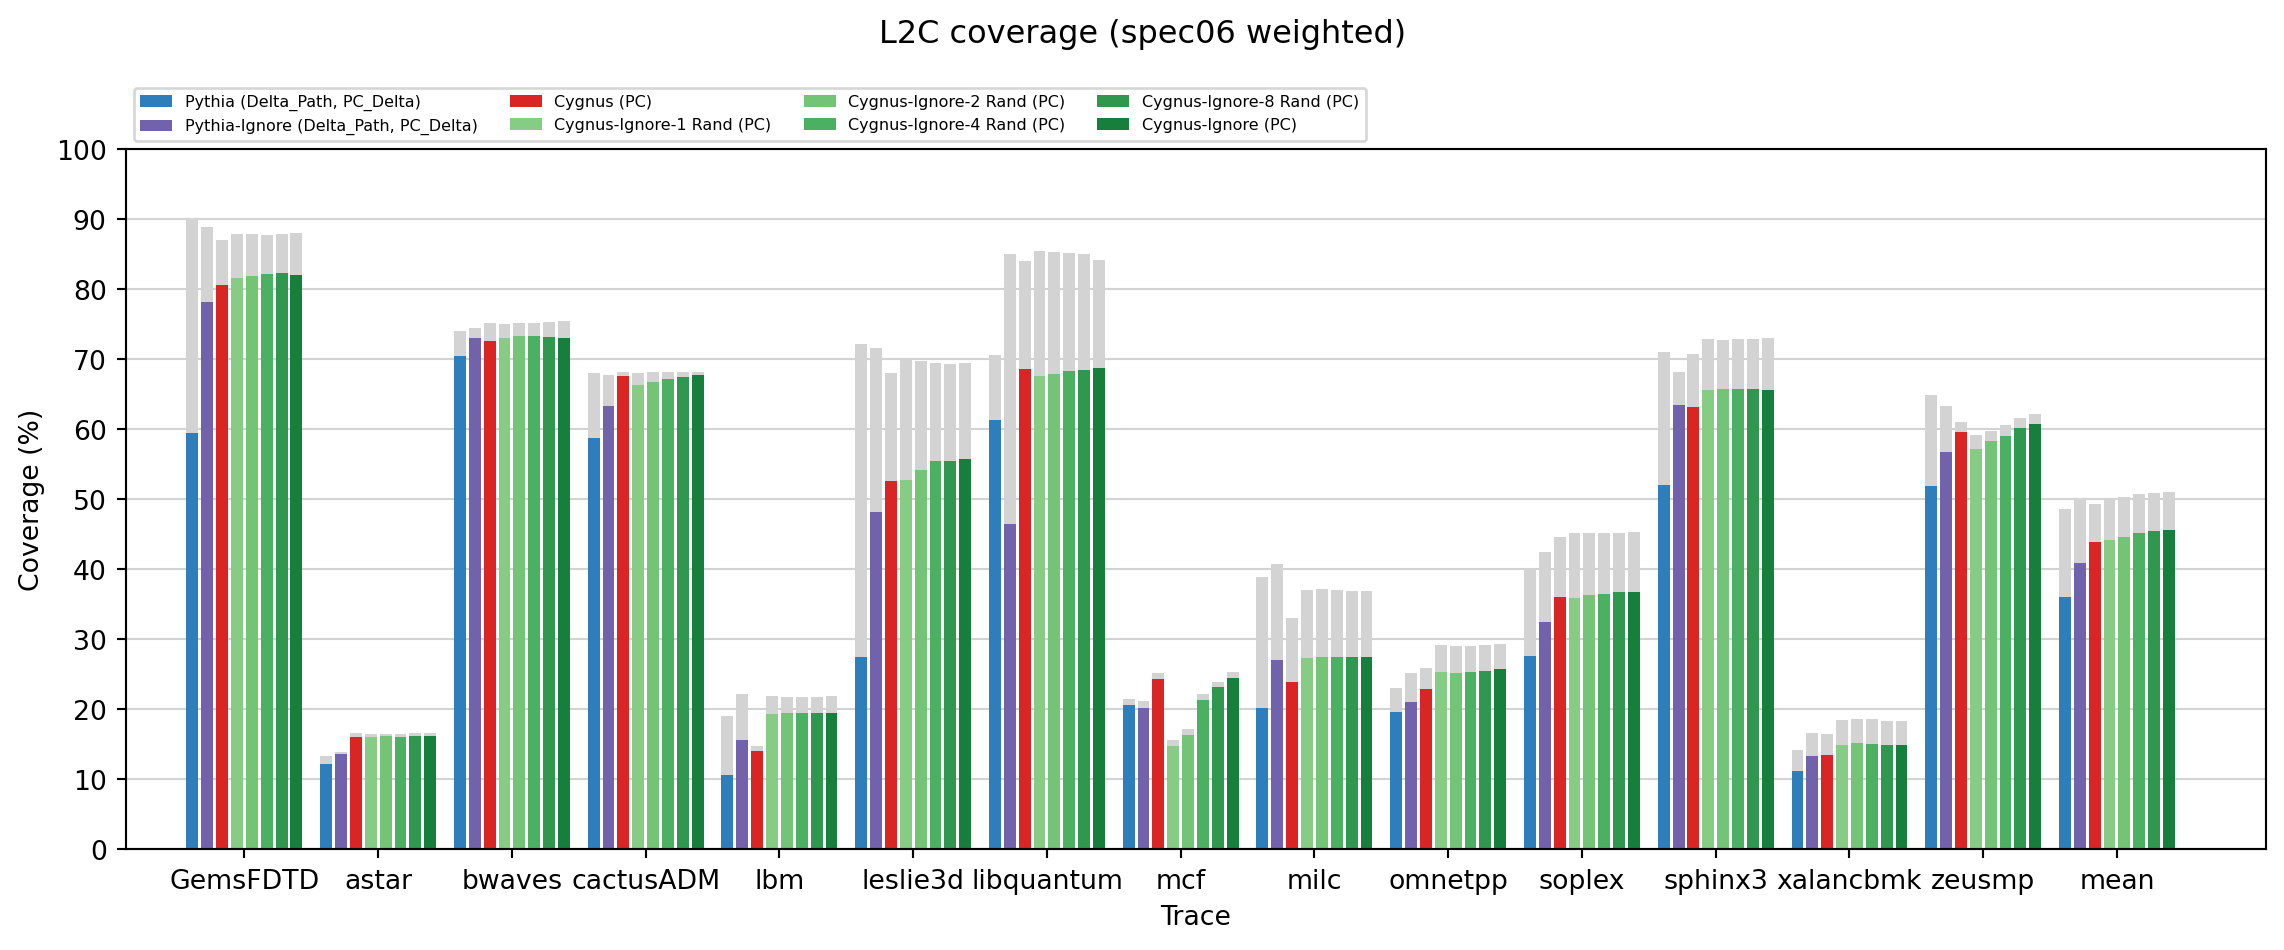

=== gap one_phase ===


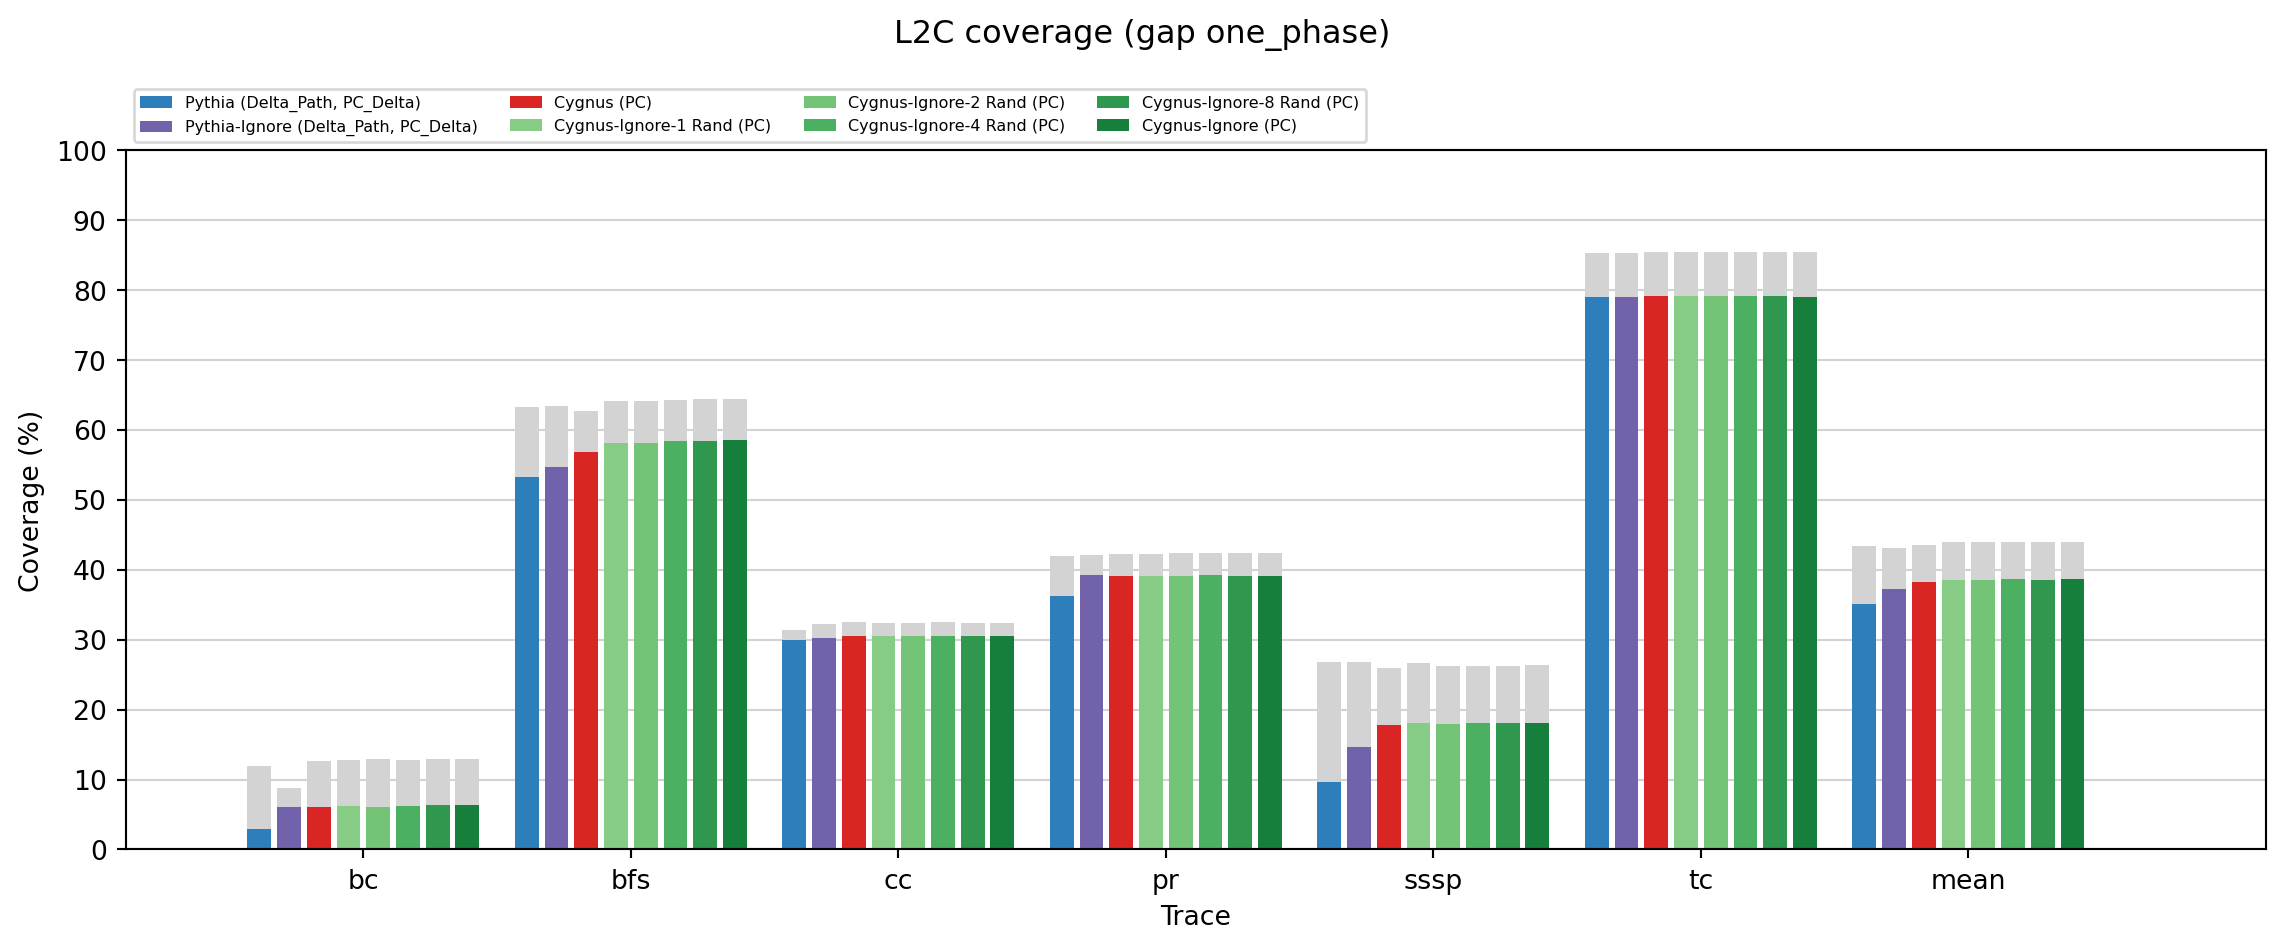

=== google one_phase ===


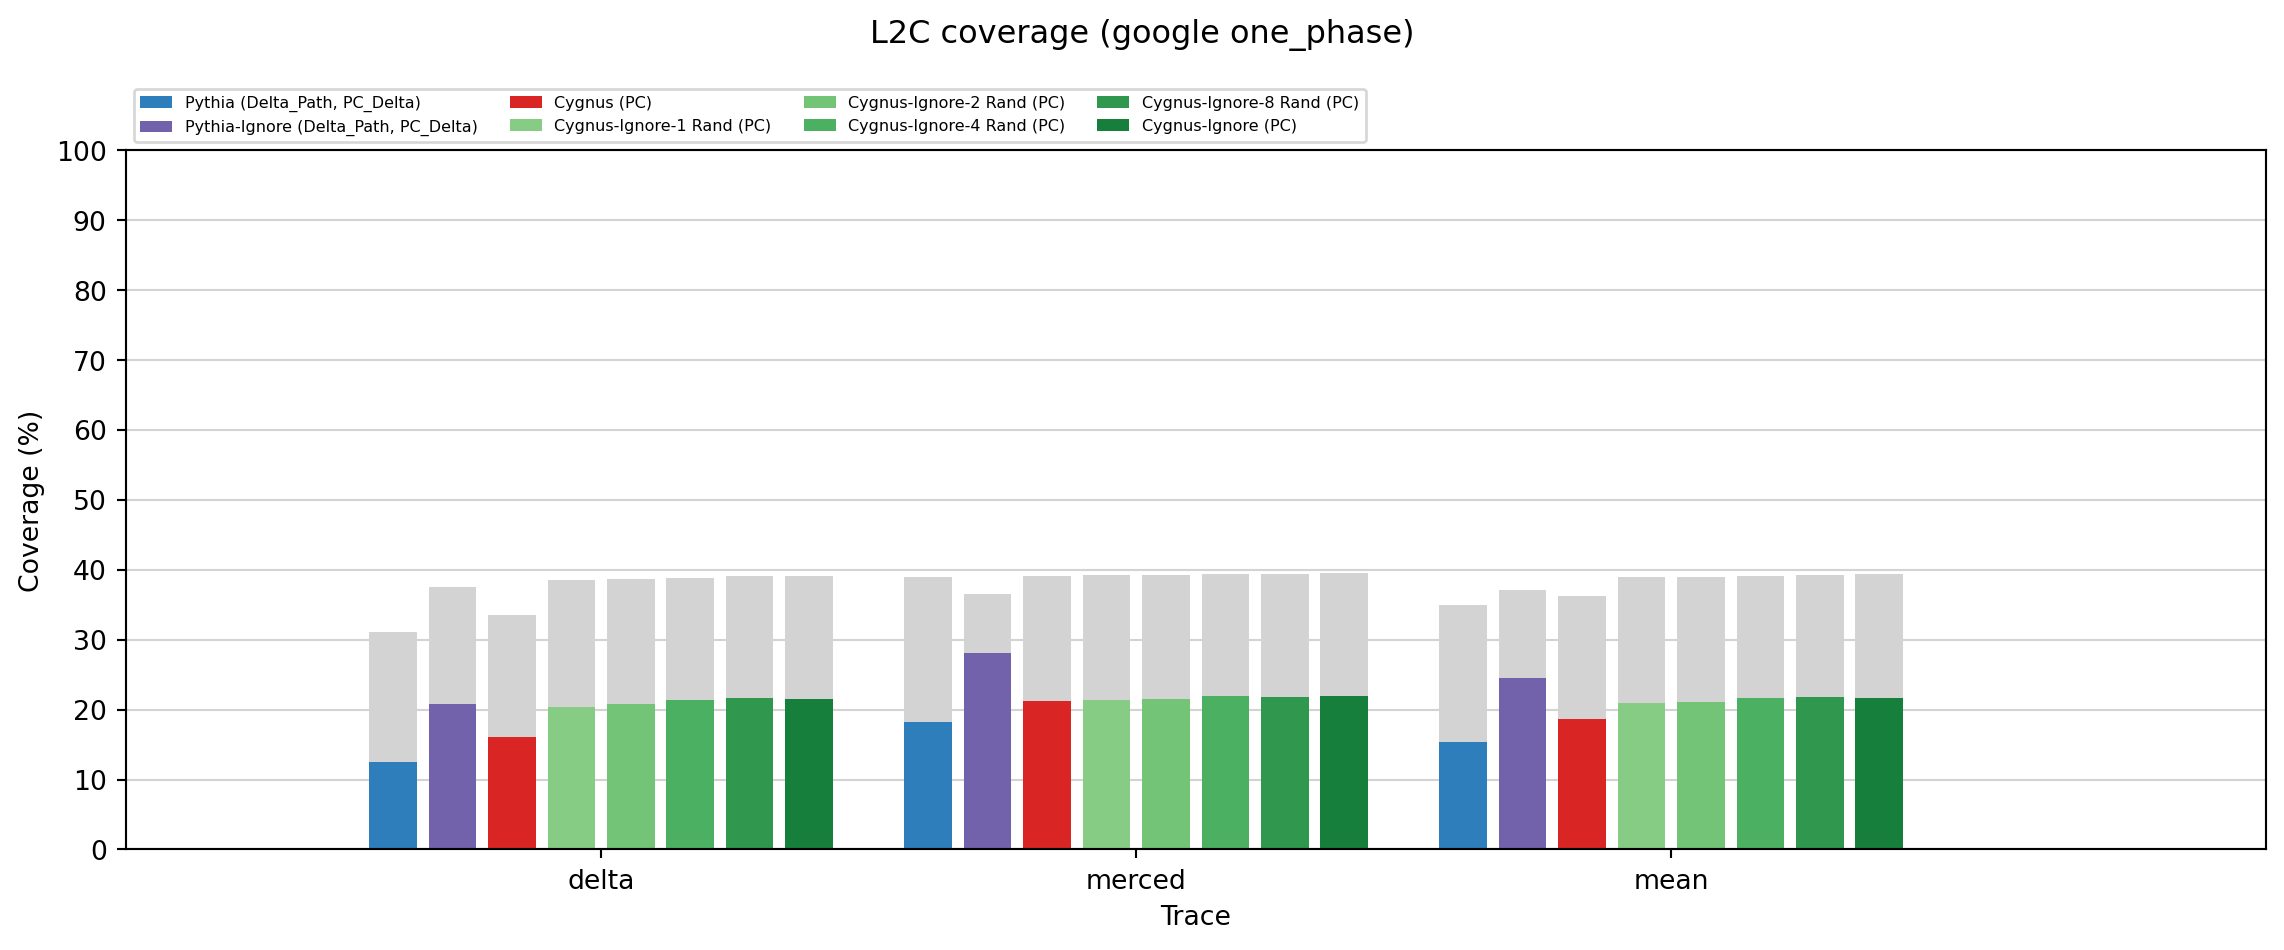

In [40]:
legend_kwargs = {
    'ncol': 4,
    'fontsize': 6,
    'loc': 'lower left',
    'bbox_to_anchor': (0, 1),
}
plots.plot_everything_coverage(rand_sample_df, suites=suites, level='L2C', colors=rand_sample_colors,
                               legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5))

## Dynamic degree

# Tables

## Degree-1
### Random action sampling

In [17]:
tables.table_everything(rand_sample_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,"Pythia (Delta_Path, PC_Delta)","Pythia-Ignore (Delta_Path, PC_Delta)",Cygnus (PC),Cygnus-Ignore (PC),Cygnus-Ignore-8 Rand (PC),Cygnus-Ignore-4 Rand (PC),Cygnus-Ignore-2 Rand (PC),Cygnus-Ignore-1 Rand (PC)
run_name,,,,,,,,
GemsFDTD_weighted,69.456295,77.897502,83.184305,86.685097,85.737869,85.832485,86.018802,85.801223
astar_weighted,7.450956,7.426817,8.219642,8.244675,8.171103,8.082768,7.985990,7.941569
bwaves_weighted,51.280546,58.349548,61.481794,62.505403,62.653622,62.995288,63.137175,63.067913
cactusADM_weighted,11.259960,11.042634,11.421406,11.464385,11.452673,11.364145,11.352425,11.343589
lbm_weighted,20.845415,26.232420,7.745898,30.838800,31.203140,31.267014,31.144152,31.012399
leslie3d_weighted,45.852901,63.054646,58.570463,62.381702,62.443128,63.114314,62.678386,62.562489
libquantum_weighted,53.527977,59.046926,73.501611,73.521886,72.618441,72.018996,71.243227,70.803822
mcf_weighted,23.632759,23.277401,25.812502,25.894174,24.818539,22.980845,17.825037,16.273148
milc_weighted,14.217358,16.383803,14.777374,13.325819,13.401161,13.608024,13.467671,13.483447


L2C_pf_issued


,"Pythia (Delta_Path, PC_Delta)","Pythia-Ignore (Delta_Path, PC_Delta)",Cygnus (PC),Cygnus-Ignore (PC),Cygnus-Ignore-8 Rand (PC),Cygnus-Ignore-4 Rand (PC),Cygnus-Ignore-2 Rand (PC),Cygnus-Ignore-1 Rand (PC)
run_name,,,,,,,,
GemsFDTD_weighted,9.083523e+05,9.179347e+05,8.988022e+05,9.108841e+05,9.085474e+05,9.077930e+05,9.081141e+05,9.077735e+05
astar_weighted,6.711602e+05,6.750050e+05,6.658520e+05,6.678432e+05,6.674834e+05,6.673513e+05,6.668554e+05,6.667161e+05
bwaves_weighted,6.553020e+05,6.688036e+05,6.605261e+05,6.778133e+05,6.760182e+05,6.757858e+05,6.757871e+05,6.755615e+05
cactusADM_weighted,4.144618e+05,4.123993e+05,4.109503e+05,4.136529e+05,4.133196e+05,4.134208e+05,4.134100e+05,4.135841e+05
lbm_weighted,2.794990e+05,3.220927e+05,2.135833e+05,3.169664e+05,3.154154e+05,3.144838e+05,3.142670e+05,3.159713e+05
leslie3d_weighted,6.332174e+05,6.243651e+05,5.979891e+05,6.121222e+05,6.123076e+05,6.130291e+05,6.147036e+05,6.164761e+05
libquantum_weighted,8.863125e+05,9.324370e+05,8.745842e+05,8.777987e+05,8.764748e+05,8.764854e+05,8.769049e+05,8.776792e+05
mcf_weighted,4.441887e+06,4.459870e+06,4.412268e+06,4.439132e+06,4.432991e+06,4.430298e+06,4.430377e+06,4.432238e+06
milc_weighted,6.042220e+05,6.513503e+05,4.621768e+05,5.548227e+05,5.579503e+05,5.592226e+05,5.592518e+05,5.591913e+05


=== gap one_phase ===
ipc_improvement


,"Pythia (Delta_Path, PC_Delta)","Pythia-Ignore (Delta_Path, PC_Delta)",Cygnus (PC),Cygnus-Ignore (PC),Cygnus-Ignore-8 Rand (PC),Cygnus-Ignore-4 Rand (PC),Cygnus-Ignore-2 Rand (PC),Cygnus-Ignore-1 Rand (PC)
run_name,,,,,,,,
bc,26.507611,22.412940,27.404960,27.461217,27.477315,27.463640,27.463640,27.460178
bfs,28.537542,28.976874,29.177219,30.969621,30.856271,30.848344,30.712403,30.601629
cc,43.018854,46.512944,48.109759,48.113552,47.585969,47.517216,47.325023,47.321072
pr,1.601591,1.917329,1.959508,1.972765,1.971559,1.979593,1.971961,1.964329
sssp,19.908874,20.576552,22.200875,22.350730,22.266880,22.316774,22.058989,22.101953
tc,25.858010,25.813959,25.929816,25.896205,25.904735,25.896459,25.904098,25.886656
mean,23.602932,23.663770,25.054049,25.374093,25.270962,25.266520,25.173292,25.157369


L2C_pf_issued


,"Pythia (Delta_Path, PC_Delta)","Pythia-Ignore (Delta_Path, PC_Delta)",Cygnus (PC),Cygnus-Ignore (PC),Cygnus-Ignore-8 Rand (PC),Cygnus-Ignore-4 Rand (PC),Cygnus-Ignore-2 Rand (PC),Cygnus-Ignore-1 Rand (PC)
run_name,,,,,,,,
bc,2897750.0,2859945.0,2.882534e+06,2901906.0,2.898730e+06,2.897120e+06,2.896683e+06,2.894018e+06
bfs,865395.0,873741.0,8.546650e+05,876111.0,8.743860e+05,8.745760e+05,8.737900e+05,8.719830e+05
cc,3784162.0,3884608.0,3.911203e+06,3943687.0,3.938392e+06,3.933420e+06,3.927564e+06,3.924690e+06
pr,6562351.0,6523431.0,6.480743e+06,6533795.0,6.526386e+06,6.518981e+06,6.514624e+06,6.511542e+06
sssp,2827548.0,2831252.0,2.839906e+06,2864672.0,2.861417e+06,2.859545e+06,2.859404e+06,2.857604e+06
tc,272933.0,273009.0,2.730010e+05,273097.0,2.730790e+05,2.730370e+05,2.731240e+05,2.730270e+05
mean,2868356.5,2874331.0,2.873675e+06,2898878.0,2.895398e+06,2.892780e+06,2.890865e+06,2.888811e+06


=== google one_phase ===
ipc_improvement


,"Pythia (Delta_Path, PC_Delta)","Pythia-Ignore (Delta_Path, PC_Delta)",Cygnus (PC),Cygnus-Ignore (PC),Cygnus-Ignore-8 Rand (PC),Cygnus-Ignore-4 Rand (PC),Cygnus-Ignore-2 Rand (PC),Cygnus-Ignore-1 Rand (PC)
run_name,,,,,,,,
delta_507252,12.101409,13.591184,10.508496,14.775896,14.704961,14.656946,14.508403,14.418611
merced_467642,16.084209,17.306165,16.510446,16.656613,16.657469,16.646061,16.603138,16.569341
mean,14.075429,15.433730,13.469794,15.712433,15.677095,15.647227,15.551024,15.488969


L2C_pf_issued


,"Pythia (Delta_Path, PC_Delta)","Pythia-Ignore (Delta_Path, PC_Delta)",Cygnus (PC),Cygnus-Ignore (PC),Cygnus-Ignore-8 Rand (PC),Cygnus-Ignore-4 Rand (PC),Cygnus-Ignore-2 Rand (PC),Cygnus-Ignore-1 Rand (PC)
run_name,,,,,,,,
delta_507252,1723988.0,1705649.0,1659416.0,1728494.0,1727921.0,1727762.0,1730383.0,1730002.0
merced_467642,689702.0,731251.0,677688.0,753941.0,753744.0,754393.0,754493.0,755091.0
mean,1206845.0,1218450.0,1168552.0,1241217.5,1240832.5,1241077.5,1242438.0,1242546.5


In [ ]:
reload(tables)
tables.table_metric_all(ddyn_fair_baseline_df, suites, 'ipc_improvement')

## Dynamic degree